In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv('Montreal Bike Lane.csv')

In [3]:
df.info

#for null values

df.duplicated().sum()
df.isnull().sum()


Date                             0
Unnamed: 1                       0
Berri1                           0
Boyer                            0
Brébeuf                          0
CSC (Côte Sainte-Catherine)      0
Maisonneuve_1                  257
Maisonneuve_2                    0
Maisonneuve_3                    0
Notre-Dame                       0
Parc                             0
Parc U-Zelt Test               267
PierDup                          0
Pont_Jacques_Cartier           110
Rachel / Hôtel de Ville          0
Rachel / Papineau                0
René-Lévesque                    0
Saint-Antoine                    0
Saint-Laurent U-Zelt Test      269
Saint-Urbain                     0
Totem_Laurier                    0
University                       0
Viger                            0
dtype: int64

In [4]:
# Set the threshold percentage for missing values
threshold = 50  # For example, drop columns with more than 50% missing values

# Calculate the percentage of missing values in each column
missing_percent = df.isnull().sum() / df.shape[0] * 100

# Drop columns where the percentage of missing values is greater than the threshold
df = df.drop(columns=missing_percent[missing_percent > threshold].index)

# Print the updated DataFrame
print(df)


         Date Unnamed: 1  Berri1  Boyer  Brébeuf  CSC (Côte Sainte-Catherine)  \
0    01-01-15       0:00      58     12        4                           17   
1    02-01-15       0:00      75      7        5                           15   
2    03-01-15       0:00      79      7        3                            7   
3    04-01-15       0:00      10      1       21                            0   
4    05-01-15       0:00      42      0        2                            0   
..        ...        ...     ...    ...      ...                          ...   
314  11-11-15       0:00    3044   1931     2828                         1393   
315  12-11-15       0:00    1751    930     1670                          888   
316  13-11-15       0:00    1818    906     1711                          873   
317  14-11-15       0:00     979    759      978                          322   
318  15-11-15       0:00     913    749     1028                          348   

     Maisonneuve_2  Maisonn

In [5]:
df.isnull().sum()

Date                             0
Unnamed: 1                       0
Berri1                           0
Boyer                            0
Brébeuf                          0
CSC (Côte Sainte-Catherine)      0
Maisonneuve_2                    0
Maisonneuve_3                    0
Notre-Dame                       0
Parc                             0
PierDup                          0
Pont_Jacques_Cartier           110
Rachel / Hôtel de Ville          0
Rachel / Papineau                0
René-Lévesque                    0
Saint-Antoine                    0
Saint-Urbain                     0
Totem_Laurier                    0
University                       0
Viger                            0
dtype: int64

In [6]:
print(df.columns)

Index(['Date', 'Unnamed: 1', 'Berri1', 'Boyer', 'Brébeuf',
       'CSC (Côte Sainte-Catherine)', 'Maisonneuve_2', 'Maisonneuve_3',
       'Notre-Dame', 'Parc', 'PierDup', 'Pont_Jacques_Cartier',
       'Rachel / Hôtel de Ville', 'Rachel / Papineau', 'René-Lévesque',
       'Saint-Antoine', 'Saint-Urbain', 'Totem_Laurier', 'University',
       'Viger'],
      dtype='object')


In [7]:
df.drop('Unnamed: 1', axis=1, inplace=True)

In [8]:
print(df.columns)

Index(['Date', 'Berri1', 'Boyer', 'Brébeuf', 'CSC (Côte Sainte-Catherine)',
       'Maisonneuve_2', 'Maisonneuve_3', 'Notre-Dame', 'Parc', 'PierDup',
       'Pont_Jacques_Cartier', 'Rachel / Hôtel de Ville', 'Rachel / Papineau',
       'René-Lévesque', 'Saint-Antoine', 'Saint-Urbain', 'Totem_Laurier',
       'University', 'Viger'],
      dtype='object')


In [9]:
df.corr(numeric_only=True)

,Berri1,Boyer,Brébeuf,CSC (Côte Sainte-Catherine),Maisonneuve_2,Maisonneuve_3,Notre-Dame,Parc,PierDup,Pont_Jacques_Cartier,Rachel / Hôtel de Ville,Rachel / Papineau,René-Lévesque,Saint-Antoine,Saint-Urbain,Totem_Laurier,University,Viger
Berri1,1.000000,0.965696,0.990664,0.968351,0.675126,0.852347,0.987158,0.970606,0.809588,0.784346,0.940384,0.972230,0.986397,0.705904,0.975329,0.949781,0.949504,0.960490
Boyer,0.965696,1.000000,0.985620,0.918574,0.701498,0.824613,0.973664,0.909941,0.884834,0.885640,0.969002,0.986568,0.967670,0.627805,0.946896,0.966096,0.860451,0.891176
Brébeuf,0.990664,0.985620,1.000000,0.958314,0.681999,0.855174,0.991193,0.957567,0.846113,0.844941,0.958738,0.985981,0.986969,0.706289,0.970240,0.962526,0.925924,0.945440
CSC (Côte Sainte-Catherine),0.968351,0.918574,0.958314,1.000000,0.591039,0.850711,0.949678,0.986262,0.706172,0.637281,0.914984,0.938934,0.947170,0.713676,0.961871,0.912875,0.974688,0.948817
Maisonneuve_2,0.675126,0.701498,0.681999,0.591039,1.000000,0.547730,0.702397,0.606925,0.588827,0.489838,0.617707,0.651562,0.714222,0.193211,0.699586,0.788005,0.560943,0.668607
Maisonneuve_3,0.852347,0.824613,0.855174,0.850711,0.547730,1.000000,0.856606,0.846447,0.704907,0.552978,0.811411,0.840510,0.852375,0.719230,0.834330,0.814572,0.837675,0.847481
Notre-Dame,0.987158,0.973664,0.991193,0.949678,0.702397,0.856606,1.000000,0.946013,0.853610,0.844889,0.931435,0.968051,0.996602,0.715114,0.958673,0.952156,0.920740,0.955721
Parc,0.970606,0.909941,0.957567,0.986262,0.606925,0.846447,0.946013,1.000000,0.687649,0.581209,0.914640,0.937903,0.943783,0.724852,0.968440,0.910112,0.987868,0.962993
PierDup,0.809588,0.884834,0.846113,0.706172,0.588827,0.704907,0.853610,0.687649,1.000000,0.898129,0.830509,0.855665,0.846085,0.583183,0.756687,0.805594,0.628989,0.715990
Pont_Jacques_Cartier,0.784346,0.885640,0.844941,0.637281,0.489838,0.552978,0.844889,0.581209,0.898129,1.000000,0.783778,0.865581,0.838183,0.411119,0.692410,0.767805,0.498844,0.633471


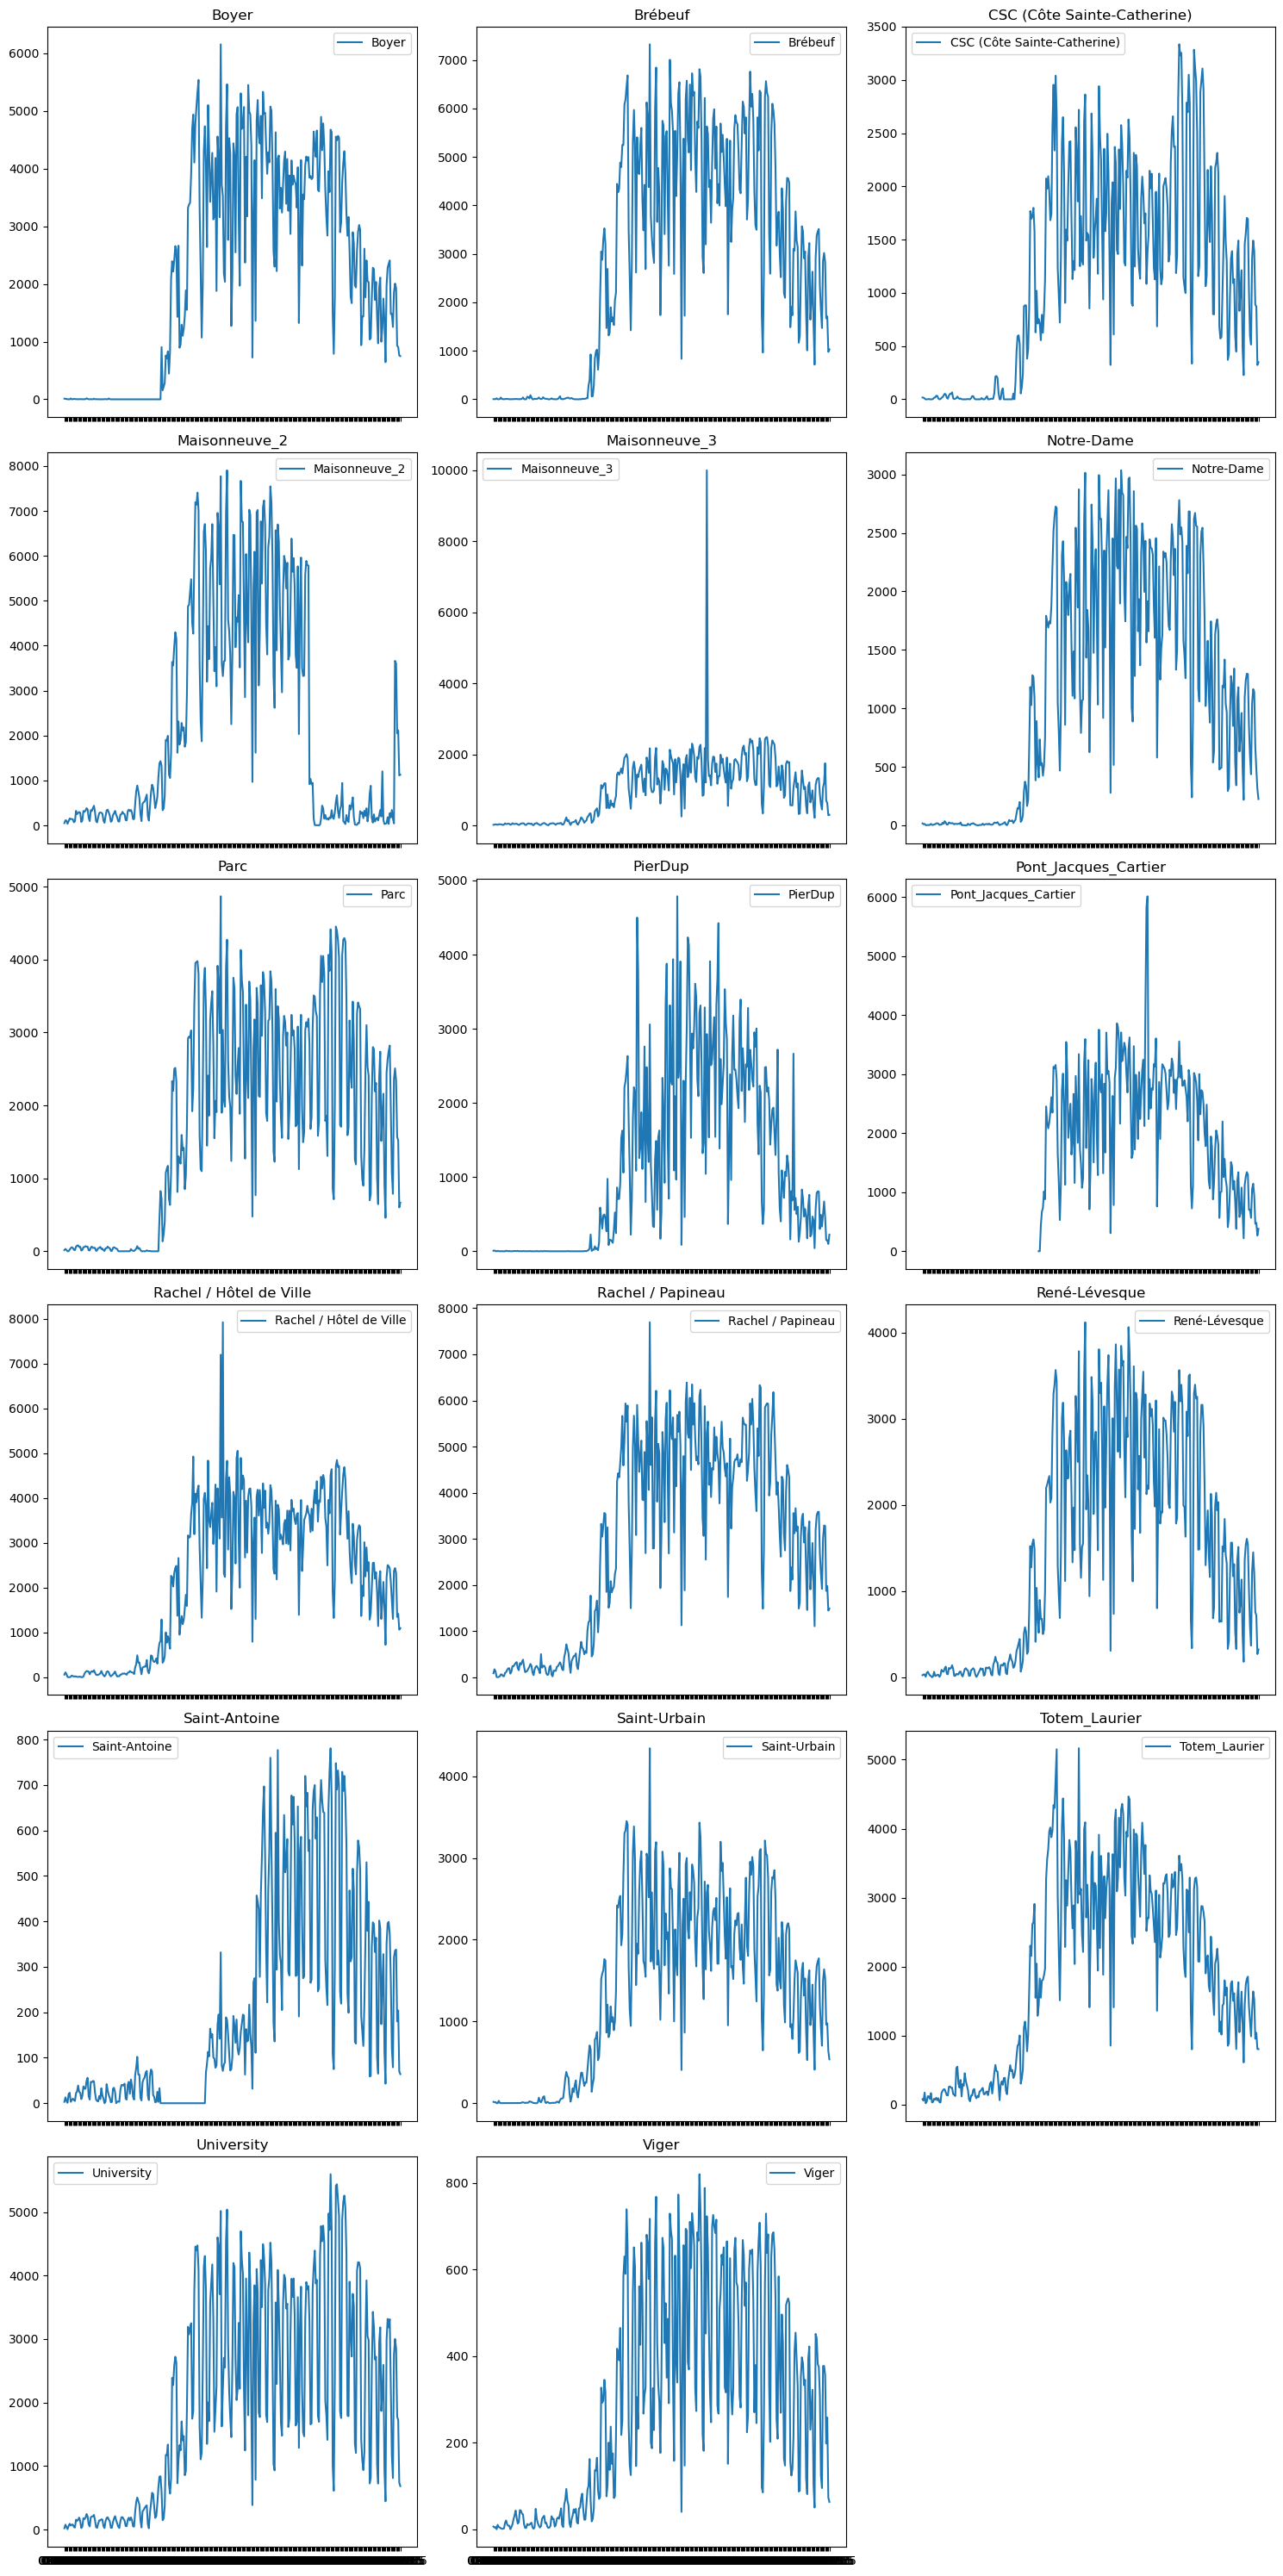

In [10]:
# plot Date by each street number of bicyclists to check correlation
df.set_index('Date', inplace=True)
street_columns = df.columns[1:22]

num_rows = (len(street_columns) - 1) // 3 + 1

# plot selected columns on separate subplots
fig, axs = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows), sharex=True)
axs = axs.ravel()
for i, street in enumerate(street_columns):
    axs[i].plot(df.index, df[street], label=street)
    axs[i].set_title(street)
    axs[i].legend()

# remove any empty subplot
for j in range(len(street_columns), len(axs)):
    fig.delaxes(axs[j])    

plt.tight_layout()
plt.show()

In [11]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)
outlier_rows = df[outliers]

print("\nOutliers based on IQR:")
print(outlier_rows)



Outliers based on IQR:
          Berri1  Boyer  Brébeuf  CSC (Côte Sainte-Catherine)  Maisonneuve_2  \
Date                                                                           
22-07-15    5396   4174     5628                         2296           6700   
01-08-15    3809   3268     4043                         1084           3691   
02-08-15    4176   3879     4438                         1389           3783   

          Maisonneuve_3  Notre-Dame  Parc  PierDup  Pont_Jacques_Cartier  \
Date                                                                       
22-07-15           9999        2562  3360     2929                2990.0   
01-08-15           1175        1563  1539     3671                5832.0   
02-08-15           1392        1916  1944     4425                6014.0   

          Rachel / Hôtel de Ville  Rachel / Papineau  René-Lévesque  \
Date                                                                  
22-07-15                     3849               5288

In [12]:
print(df.dtypes)

Berri1                           int64
Boyer                            int64
Brébeuf                          int64
CSC (Côte Sainte-Catherine)      int64
Maisonneuve_2                    int64
Maisonneuve_3                    int64
Notre-Dame                       int64
Parc                             int64
PierDup                          int64
Pont_Jacques_Cartier           float64
Rachel / Hôtel de Ville          int64
Rachel / Papineau                int64
René-Lévesque                    int64
Saint-Antoine                    int64
Saint-Urbain                     int64
Totem_Laurier                    int64
University                       int64
Viger                            int64
dtype: object


In [13]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df < lower_bound) | (df > upper_bound)).any(axis=1)
outlier_rows = df[outliers]

print("\nOutliers based on IQR:")
print(outlier_rows)



Outliers based on IQR:
          Berri1  Boyer  Brébeuf  CSC (Côte Sainte-Catherine)  Maisonneuve_2  \
Date                                                                           
22-07-15    5396   4174     5628                         2296           6700   
01-08-15    3809   3268     4043                         1084           3691   
02-08-15    4176   3879     4438                         1389           3783   

          Maisonneuve_3  Notre-Dame  Parc  PierDup  Pont_Jacques_Cartier  \
Date                                                                       
22-07-15           9999        2562  3360     2929                2990.0   
01-08-15           1175        1563  1539     3671                5832.0   
02-08-15           1392        1916  1944     4425                6014.0   

          Rachel / Hôtel de Ville  Rachel / Papineau  René-Lévesque  \
Date                                                                  
22-07-15                     3849               5288

In [14]:
# Count the number of outliers per column
outlier_counts = (df < lower_bound) | (df > upper_bound)
outlier_summary = outlier_counts.sum()

print("Number of Outliers per Column:")
print(outlier_summary)


Number of Outliers per Column:
Berri1                         0
Boyer                          0
Brébeuf                        0
CSC (Côte Sainte-Catherine)    0
Maisonneuve_2                  0
Maisonneuve_3                  1
Notre-Dame                     0
Parc                           0
PierDup                        0
Pont_Jacques_Cartier           2
Rachel / Hôtel de Ville        0
Rachel / Papineau              0
René-Lévesque                  0
Saint-Antoine                  0
Saint-Urbain                   0
Totem_Laurier                  0
University                     0
Viger                          0
dtype: int64


In [15]:
# impute the outlier in Maisonneuve_3 value of 9999 with a sensible value based on the surrounding data points

df = pd.read_csv('Montreal Bike Lane.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
outlier_index1 = pd.to_datetime('22/07/2015')

# find the surrounding data points
days_before1 = 3
days_after1 = 3
surrounding_data1 = df.loc[outlier_index1 - pd.DateOffset(days=days_before1):outlier_index1 + pd.DateOffset(days=days_after1)]

# calculate the imputation value using the median
imputation_value1 = surrounding_data1['Maisonneuve_3'].median()

# replace the outlier with the imputation value
df.loc[outlier_index1, 'Maisonneuve_3'] = imputation_value1

# the outlier has been replaced with 1411
print(df.loc[outlier_index1, 'Maisonneuve_3'])




# impute the outlier in Rachel / Hôtel de Ville value of 7197/7921 with a sensible value based on the surrounding data points
outlier_index2 = pd.to_datetime('29/05/2015')

# find the surrounding data points
days_before2 = 3
days_after2 = 1
surrounding_data2 = df.loc[outlier_index2 - pd.DateOffset(days=days_before2):outlier_index2 + pd.DateOffset(days=days_after2)]

# calculate the imputation value using the median
imputation_value2 = surrounding_data2['Rachel / Hôtel de Ville'].median()

# replace the outlier with the imputation value
df.loc[outlier_index2, 'Rachel / Hôtel de Ville'] = imputation_value2

# the outlier has been replaced with 3754
print(df.loc[outlier_index2, 'Rachel / Hôtel de Ville'])

outlier_index3 = pd.to_datetime('31/05/2015')

# find the surrounding data points
days_before3 = 10
days_after3 = 10
surrounding_data3 = df.loc[outlier_index3 - pd.DateOffset(days=days_before3):outlier_index3 + pd.DateOffset(days=days_after3)]

# calculate the imputation value using the median
imputation_value3 = surrounding_data3['Rachel / Hôtel de Ville'].median()

# replace the outlier with the imputation value
df.loc[outlier_index3, 'Rachel / Hôtel de Ville'] = imputation_value3

# the outlier has been replaced with 3661
print(df.loc[outlier_index3, 'Rachel / Hôtel de Ville'])

1411
3754
3661


C:\Users\windows 10\AppData\Local\Temp\ipykernel_5424\2275777833.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\windows 10\AppData\Local\Temp\ipykernel_5424\2275777833.py:6: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  outlier_index1 = pd.to_datetime('22/07/2015')
C:\Users\windows 10\AppData\Local\Temp\ipykernel_5424\2275777833.py:26: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  outlier_index2 = pd.to_datetime('29/05/2015')
C:\Users\windows 10\AppData\Local\Temp\ipykernel_5424\2275777833.py:42: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the

In [123]:
print(df.columns)

Index(['Unnamed: 1', 'Berri1', 'Boyer', 'Brébeuf',
       'CSC (Côte Sainte-Catherine)', 'Maisonneuve_1', 'Maisonneuve_2',
       'Maisonneuve_3', 'Notre-Dame', 'Parc', 'Parc U-Zelt Test', 'PierDup',
       'Pont_Jacques_Cartier', 'Rachel / Hôtel de Ville', 'Rachel / Papineau',
       'René-Lévesque', 'Saint-Antoine', 'Saint-Laurent U-Zelt Test',
       'Saint-Urbain', 'Totem_Laurier', 'University', 'Viger'],
      dtype='object')


C:\Users\windows 10\AppData\Local\Temp\ipykernel_5424\393048123.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


Mean Squared Error: 6033.98291667239
R-squared: 0.9947351813938451


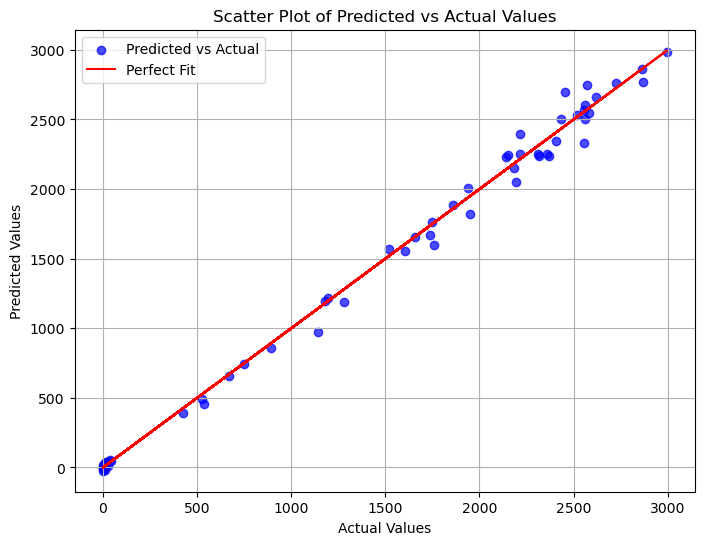

Root Mean Squared Error (RMSE): 77.6787159823873


,Actual,Predicted
Date,,
2015-03-15,1,-2.625083
2015-07-08,2315,2238.445042
2015-01-26,24,32.472212
2015-07-28,2581,2545.514159
2015-10-01,3,-12.626049
2015-12-04,667,658.080235
2015-06-26,2865,2859.306115
2015-06-07,2870,2772.656099
2015-05-03,14,41.254046


In [17]:
# drop columns with insufficient data, pre-processing data
pd.set_option('display.max.rows',100)
df = pd.read_csv('Montreal Bike Lane.csv')
df.drop(columns=['Maisonneuve_1', 'Parc U-Zelt Test', 'Saint-Laurent U-Zelt Test','Pont_Jacques_Cartier','Unnamed: 1' ], inplace=True)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# correlation, feature selection
correlation_map = df.corr()
target_street = 'Notre-Dame'
top_correlated_streets = correlation_map[target_street].nlargest(10).index.tolist()
top_correlated_streets.remove(target_street)

# data splitting
X = df[top_correlated_streets]
y = df[target_street]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model selection and training
model = LinearRegression()
model.fit(X_train, y_train)

# model evaluation
y_pred = model.predict(X_test)

comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# comparison plot of 'Actual' and 'Predicted' values
actual_values = comparison_df['Actual']
predicted_values = comparison_df['Predicted']

plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_values, alpha=0.7, color='b', label='Predicted vs Actual')
plt.plot(actual_values, actual_values, color='r', label='Perfect Fit')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.legend()
plt.grid(True)
plt.show()

mse = 6033.982916672392

# calculate the RMSE
rmse = np.sqrt(mse)

print(f"Root Mean Squared Error (RMSE): {rmse}")

comparison_df